In [64]:
import os
import numpy as np

# Path to the images data
DATA_PATH = 'C:/Users/schmi/Dataset/Dataset_DOTR/dataset4722' 

GENRE = ['cercle','carre','hexagone']

def load_images_from_folder(folder_path, class_label, img_size=(64, 64)):
    """
    Charger les images depuis un dossier et les redimensionner.
    """
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        # Lire l'image en niveaux de gris car elle est binarisée
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            # Redimensionner l'image à la taille spécifiée
            img = cv2.resize(img, img_size)
            images.append(img)
            labels.append(class_label)  # Ajouter le label correspondant

    return images, labels
    
def load_dataset(data_path, genres, img_size=(64, 64)):
    # Dictionnaire pour stocker le nombre d'images par genre
    image_count_per_genre = {}
    all_images = []
    all_labels = []

    for genre in genres:
        # Construire le chemin complet du sous-dossier
        genre_path = os.path.join(data_path, genre)

        # Vérifier si le répertoire existe
        if not os.path.exists(genre_path):
            print(f"Répertoire non trouvé : {genre_path}")
            continue

        # Compter le nombre d'images dans le répertoire du genre actuel
        num_images = len([f for f in os.listdir(genre_path) if f.endswith(('.jpg', '.png'))])
        image_count_per_genre[genre] = num_images

        print(f"{genre} : {num_images} images trouvées")
        
    for class_label, class_name in enumerate(genres):
        class_folder = os.path.join(data_path, class_name)
        
        if os.path.exists(class_folder):
            print(f"Chargement des images de la classe: {class_name}")
            images, labels = load_images_from_folder(class_folder, class_label, img_size)
            all_images.extend(images)
            all_labels.extend(labels)
        else:
            print(f"Le dossier pour la classe {class_name} n'a pas été trouvé.")

    # Convertir les listes en tableaux numpy
    all_images = np.array(all_images)
    all_labels = np.array(all_labels)

    return all_images, all_labels

# Charger le dataset et afficher le comptage des images par genre
#image_counts = load_dataset(DATA_PATH, GENRE)

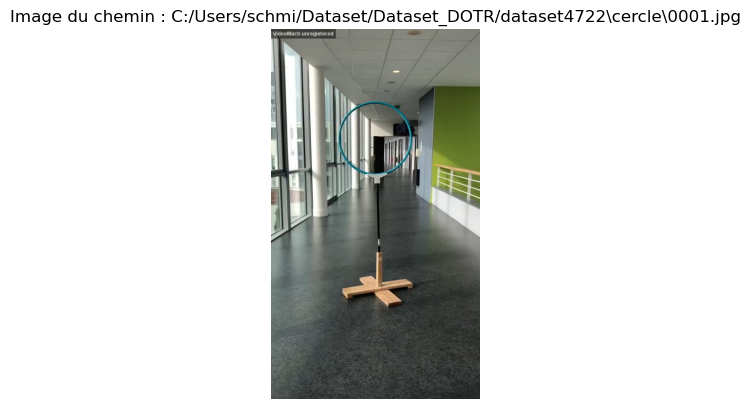

In [16]:
import cv2
import matplotlib.pyplot as plt

def load_image_as_variable(data_path, genre, image_index=0):
    genre_path = os.path.join(data_path, genre)
    image_files = [f for f in os.listdir(genre_path) if f.endswith(('.jpg', '.png'))]
    
    # Lire l'image spécifiée par l'index
    image_path = os.path.join(genre_path, image_files[image_index])
    image = cv2.imread(image_path)

    return image, image_path

# Charger une image du genre 'cercle' et la stocker en tant que variable
image, image_pat = load_image_as_variable(DATA_PATH, 'cercle')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en RGB pour matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Masquer les axes
plt.title(f"Image du chemin : {image_path}")
plt.show()

# Pré-traitement d'image

On n'est pas Google donc on possède pas le glitch argent + temps illimité. On doit faire les choses simples, on ne garde que les informations ultra pertinentes. On essaie dans un premier temps un masque rouge puis on binarise l'image.

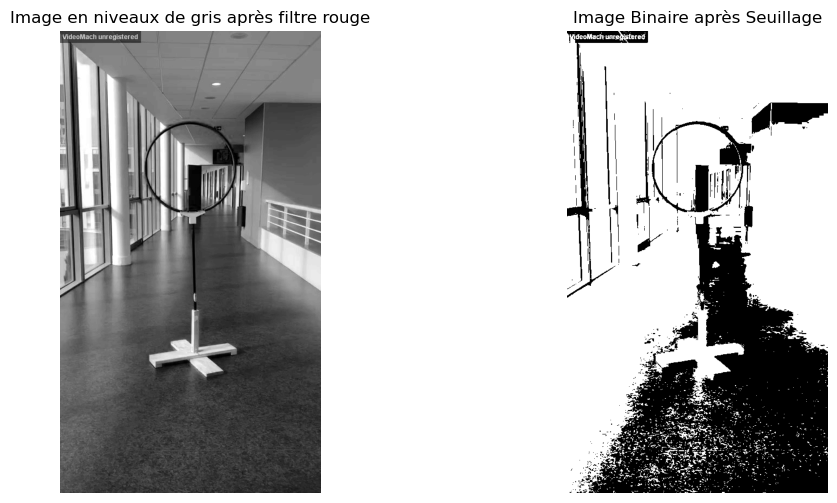

In [49]:
if image is None:
    print("L'image n'a pas pu être chargée. Vérifiez le chemin du fichier.")
else:
    # Créer un filtre rouge en mettant à 0 les canaux vert et bleu
    red_filter = image.copy()
    red_filter[:, :, 1] = 0  # Supprimer le canal vert
    red_filter[:, :, 0] = 0  # Supprimer le canal bleu

    # Convertir l'image filtrée en niveaux de gris
    gray_image = cv2.cvtColor(red_filter, cv2.COLOR_BGR2GRAY)

    # Afficher l'image en niveaux de gris
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.title("Image en niveaux de gris après filtre rouge")

    # Appliquer un seuillage binaire (binary threshold) pour isoler les objets bleus
    _, binary_image = cv2.threshold(gray_image, 20, 170, cv2.THRESH_BINARY)  # Seuillage inversé pour mettre les objets en blanc

    # Afficher l'image binaire résultante
    plt.subplot(1, 2, 2)
    plt.imshow(binary_image, cmap='gray')
    plt.axis('off')
    plt.title("Image Binaire après Seuillage")

    plt.show()

On essaie cette fois de garder uniquement la composante bleu de l'image puis on binarise.

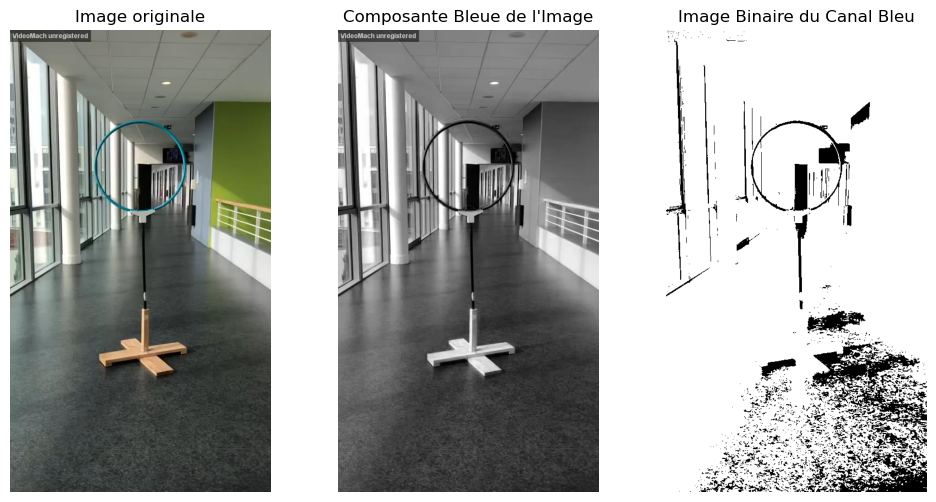

In [47]:
if image is None:
    print("L'image n'a pas pu être chargée. Vérifiez le chemin du fichier.")
else:
    # Afficher l'image originale
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Image originale")

    # Extraire la composante bleue de l'image (canal bleu)
    blue_channel = image[:, :, 2]  # Accéder au canal bleu

    # Afficher l'image correspondant au canal bleu
    plt.subplot(1, 3, 2)
    plt.imshow(blue_channel, cmap='gray')
    plt.axis('off')
    plt.title("Composante Bleue de l'Image")

    # Appliquer un seuillage binaire sur la composante bleue
    _, binary_blue = cv2.threshold(blue_channel, 50, 255, cv2.THRESH_BINARY)  # Ajuste le seuil selon l'intensité désirée

    # Afficher l'image binaire obtenue après le seuillage
    plt.subplot(1, 3, 3)
    plt.imshow(binary_blue, cmap='gray')
    plt.axis('off')
    plt.title("Image Binaire du Canal Bleu")

    plt.show()

La deuxième méthode est bien mieux mais on risque d'avoir certain problème pour les cibles hexagones et carrées de couleur différentes.

# Création du nouveau dataset pré-traité 

In [ ]:
OUTPUT_PATH = 'C:/Users/schmi/Dataset/Dataset_DOTR/dataset_preprocessed' 

# Créer le dossier de sortie s'il n'existe pas
os.makedirs(OUTPUT_PATH, exist_ok=True)

def preprocess_image(image_path):
    """
    Fonction pour prétraiter une image en extrayant la composante bleue et en appliquant une binarisation.
    """
    # Lire l'image
    image = cv2.imread(image_path)
    
    # Vérifier si l'image a été correctement chargée
    if image is None:
        print(f"Erreur lors du chargement de l'image : {image_path}")
        return None

    # Extraire la composante bleue
    blue_channel = image[:, :, 2]

    # Appliquer une binarisation sur la composante bleue
    _, binary_image = cv2.threshold(blue_channel, 50, 255, cv2.THRESH_BINARY)  # Ajuster le seuil si nécessaire

    return binary_image

def process_dataset(data_path, genres, output_path):
    """
    Fonction pour prétraiter toutes les images dans le dataset et les enregistrer dans le dossier de sortie.
    """
    for genre in genres:
        genre_input_path = os.path.join(data_path, genre)  # Chemin vers le sous-dossier d'entrée (par genre)
        genre_output_path = os.path.join(output_path, genre)  # Chemin vers le sous-dossier de sortie (par genre)

        # Créer le dossier de sortie pour chaque genre
        os.makedirs(genre_output_path, exist_ok=True)

        # Lister toutes les images dans le sous-dossier actuel
        image_files = [f for f in os.listdir(genre_input_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

        for image_file in image_files:
            # Chemin complet de l'image
            image_path = os.path.join(genre_input_path, image_file)

            # Prétraiter l'image
            preprocessed_image = preprocess_image(image_path)

            if preprocessed_image is not None:
                # Chemin de sauvegarde de l'image prétraitée
                output_image_path = os.path.join(genre_output_path, image_file)

                # Enregistrer l'image prétraitée
                cv2.imwrite(output_image_path, preprocessed_image)
                print(f"Image enregistrée : {output_image_path}")
            else:
                print(f"Échec du prétraitement pour l'image : {image_path}")

# Appliquer le prétraitement à toutes les images du dataset
process_dataset(DATA_PATH, GENRE, OUTPUT_PATH)

In [66]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

IMG_SIZE = (64, 64)  # Taille à laquelle les images seront redimensionnées

# Chargement des données du dataset pré-traité 
X, y = load_dataset(OUTPUT_PATH, GENRE, IMG_SIZE) 

cercle : 2040 images trouvées
carre : 0 images trouvées
hexagone : 0 images trouvées
Chargement des images de la classe: cercle
Chargement des images de la classe: carre
Chargement des images de la classe: hexagone


# Train/Test split

In [68]:
# One hot encode outputs
y = to_categorical(y, num_classes=len(GENRE))

# Split validation data from training data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalization

In [69]:
# Normalize inputs from 0-255 to 0-1
X_train_norm = X_train / 255
X_val_norm = X_val / 255

In [74]:
# Vérification des dimensions
print(f"Dimensions des données d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Dimensions des données de validation : {X_val.shape}, {y_val.shape}")

Dimensions des données d'entraînement : (1632, 64, 64), (1632, 3, 3)
Dimensions des données de validation : (408, 64, 64), (408, 3, 3)


# Création modèle CNN 

In [77]:
# Define the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Create the model
model = Sequential()